## Tensor flow para principiantes (I)


### Resumen

    Con éste artículo se abre una serie de tutoriales sobre el uso de la librería de TensorFlow para el reconocimiento de imágenes.  En esta primera entrega, analizaremos los conceptos básicos de la librería y su implementación en un modelo simple para el reconocimiento de dígitos escritos a mano.



## Introducción

Dentro del compromiso que tiene APSL relacionado con la generación  y divulgación de conocimiento,   el equipo del departamento de  Ciencias de Datos y Machine Learning  quiere ofrecer  una serie de tutoriales sobre el uso de TensorFlow para el reconocimientos de imágenes.

El objetivo de éstos tutoriales,  que se irán publicando periódicamente,  es el de ofrecer de  manera sencilla y didáctica,  a través de ejemplos prácticos, los fundamentos y conceptos básicos esenciales para la tarea de reconocimiento de imágenes.  Al acabar la serie habremos desarrollado una aplicación que permita crear una red neuronal en TensorFlow, entrenable y capaz de reconocer nuestra propia base de datos de imágenes.  

Para lograrlo empezaremos nuestro camino con ejemplos muy simples donde se irán introduciendo los aspectos básicos de TensorFlow, y  que iremos avanzando en nuestros conocimientos hasta alcanzar el objetivo propuesto.

El contenido de estos turoriales están elaborados con la recopilación de distintas fuentes (manuales y blogs), así como con conocimiento adquirido de nuestra experiencia en el desarrollo de  aplicaciones propias para distintas tareas en diferentes áreas. En la bibliografía haremos referencia a las diversas fuentes utilizadas.


Comencemos entonces !!!



#### ¿ Qué es TensorFlow ?

TensorFlow es una librería de código abierto para cálculo numérico, usando como forma de programación grafos de  flujo de datos.  Los nodos en el grafo representan operaciones matemáticas, mientras que las conexiones o links del grafo representan los conjuntos de datos multidimensionales (tensores) .

Con esta librería somos capaces, entre otras operaciones, de construir y entrenar redes neuronales para detectar correlaciones y descifrar patrones, análogos al aprendizaje y razonamiento usados por los humanos.​  Actualmente se utiliza Tensorflow tanto en la investigación como para la producción de productos de Google,  remplazando el rol de su predecesor de código cerrado, [DistBelief]. 

TensorFlow es el sistema de aprendizaje automático de segunda generación de Google Brain, liberado como software de código abierto el 9 de noviembre del 2015. Mientras la implementación de referencia se ejecuta en dispositivos aislados, TensorFlow puede correr en múltiple CPUs y GPUs (con extensiones opcionales de CUDA para informática de propósito general en unidades de procesamiento gráfico). TensorFlow está disponible en Linux de 64 bits, macOS, y plataformas móviles que incluyen Android e iOS.

Los cómputos de TensorFlow están expresados como [stateful dataflow graphs]. El nombre TensorFlow deriva de las operaciones que las redes neuronales realizan sobre arrays multidimensionales de datos. Estos arrays multidimensionales son referidos como "tensores" (más detalles ver [https://www.tensorflow.org/]). 

#### Reconocimiento de dígitos escrito a  mano

En  éste primer tutorial  mostraremos el flujo de trabajo básico al usar TensorFlow con un modelo lineal simple. El ejemplo que seguiremos para ello es desarrollar una aplicación que reconozca los dígitos escrito a mano. 

Comenzaremos por implementar el modelo más sencillo posible. En este caso, haremos una regresión lineal como primer modelo para el reconocimiento de los dígitos tratados como imágenes.

Primero procederemos a cargar un conjunto de imágenes  de los dígitos escrito a mano del conjunto de datos [MNIST],  luego procederemos a definir y optimizar un modelo matemático de regresión lineal en TensorFlow.

*Nota:* Algunas nociones básicas sobre Python  y alguna comprensión básica sobre Machine Learning ayudan a una mejor comprensión.

Primero cargaremos algunas librería

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

tf.__version__

'1.0.1'


## Descargamos los Datos (Load Data)

El conjunto de datos MNIST es de aproximadamente 12 MB y se descargará automáticamente si no se encuentra en la ruta dada.


In [2]:
# Load Data.....
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


* **Verificamos los datos** 

In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


Como se observa, ahora tenemos tres sub conjunto de datos, uno de entrenamiento, uno de test y otro de validación. 


## One-Hot Encoding

El conjunto de datos se ha cargado con la codificación denominada  One-Hot.  Esto significa que las etiquetas se han convertido de un solo número a un vector cuya longitud es igual a la cantidad de clases posibles. Todos los elementos del vector son cero excepto  el elemento i ésimo que toma el valor uno;  y significa que la clase es i. 

**Por ejemplo**, las etiquetas codificadas de One-Hot para las primeras 5 imágenes en el conjunto de prueba son:

In [4]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

Como se observa, tenemos cinco vectores donde cada componete tiene valores cero excepto en la posición de la componete que identifica la clase, cuyo valor es 1. 

Como necesitamos las clases como números únicos para las comparaciones y medidas de rendimiento,  procedemos a convertir estos vectores codificados como One-Hot a un solo número tomando el índice del elemento más alto. Tenga en cuenta que la palabra **'clase'** es una palabra clave utilizada en Python, por lo que necesitamos usar el nombre **'cls'** en su lugar.


Para codificar estos vectores a números:

In [5]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

Ahora podemos ver la clase para las primeras cinco imágenes en el conjunto de pruebas.  

In [6]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

Comparemos estos con los vectores codificados One-Hot de arriba. Por ejemplo, la clase para la primera imagen es 7, que corresponde a un vector codificado One-Hot donde todos los elementos son cero excepto  el elemento con índice 7.

El siguiente paso es definir algunas variables que se usaran en el código.
Estas variables y sus valores constantes nos permitirá tener un código más limpio y fácil de leer.

Las definimos de la siguiente manera: 

In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10


Ahora crearemos una función que es utilizada para trazar 9 imágenes en una cuadrícula de 3x3 y escribir las clases verdaderas y predichas debajo de cada imagen.

In [8]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

Dibujemos algunas imágenes para ver si los datos son correctos

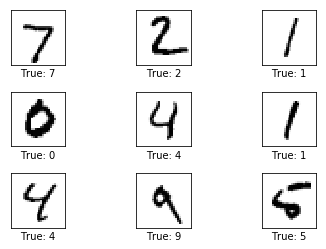

In [9]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

# Placeholder variables

El propósito completo de TensorFlow es tener un gráfico computacional que se puede ejecutar de manera mucho más eficiente que si los mismos cálculos se realizaran directamente en Python. TensorFlow puede ser más eficiente que NumPy porque TensorFlow conoce todo el gráfico de cálculo que debe ejecutarse, mientras que NumPy solo conoce el cálculo de una sola operación matemática a la vez.

TensorFlow también puede calcular automáticamente los gradientes que se necesitan para optimizar las variables del gráfico a fin de que el modelo funcione mejor. Esto se debe a que el gráfico es una combinación de expresiones matemáticas simples, por lo que el gradiente de todo el gráfico se puede calcular utilizando la regla de cadena para las derivadas.

TensorFlow también puede aprovechar CPUs de múltiples núcleos, así como GPUs, y Google incluso ha creado chips especiales solo para TensorFlow que se denominan TPU (Unidades de procesamiento de tensor) y son incluso más rápidos que las GPU.

Un gráfico de TensorFlow consta de las siguientes partes que se detallarán a continuación:

    Las variables de marcador de posición utilizadas para cambiar la entrada al gráfico.
    Las variables del modelo que se van a optimizar para hacer que el modelo funcione mejor.
    El modelo que es esencialmente solo una función matemática que calcula algunos resultados dada la entrada en las variables del marcador de posición y las variables del modelo.
    Una medida de costo que se puede usar para guiar la optimización de las variables.
    Un método de optimización que actualiza las variables del modelo.

Además, el gráfico TensorFlow también puede contener varias declaraciones de depuración, p. Ej. para que los datos de registro se muestren utilizando TensorBoard, que no se trata en este tutorial.
Las variables de marcador de posición

Las variables de marcador de posición sirven como la entrada al gráfico que podemos cambiar cada vez que ejecutamos el gráfico. Llamamos a esto alimentar las variables de marcador de posición y se demuestra más adelante.

Primero definimos la variable de marcador de posición para las imágenes de entrada. Esto nos permite cambiar las imágenes que se ingresan al gráfico de TensorFlow. Este es un llamado tensor, que simplemente significa que es un vector o matriz multidimensional. El tipo de datos se establece en float32 y la forma se establece en [Ninguno, img_size_flat], donde Ninguno significa que el tensor puede contener una cantidad arbitraria de imágenes, siendo cada imagen un vector de longitud img_size_flat.

In [10]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

A continuación, tenemos la variable de marcador de posición para las etiquetas verdaderas asociadas con las imágenes que se ingresaron en la variable de marcador de posición x. La forma de esta variable de marcador de posición es [Ninguno, clases_de_número] lo que significa que puede contener una cantidad arbitraria de etiquetas y cada etiqueta es un vector de longitud de clase_de_número que es 10 en este caso.

In [11]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

Finalmente, tenemos la variable de marcador de posición para la clase verdadera de cada imagen en la variable de marcador de posición x. Estos son enteros y la dimensionalidad de esta variable de marcador de posición se establece en [Ninguno], lo que significa que la variable marcador de posición es un vector unidimensional de longitud arbitraria.

In [12]:
y_true_cls = tf.placeholder(tf.int64, [None])

# Variables a optimizar

Además de las variables de marcador de posición (placeholder) que se definieron anteriormente y que sirven como datos de entrada de alimentación en el modelo, también hay algunas variables de modelo que deben ser modificadas por TensorFlow para que el modelo funcione mejor en los datos de entrenamiento.

La primera variable que debe optimizarse se llama ponderaciones (weights) y se define aquí como una variable TensorFlow que debe inicializarse con ceros y cuya forma es [img_size_flat, num_classes], por lo que es un tensor bidimensional (o matriz) con filas img_size_flat y num_classes columnas

In [13]:
w = tf.Variable(tf.zeros([img_size_flat, num_classes]))

La segunda variable que debe optimizarse se denomina sesgos (biases) y se define como un tensor (o vector) unidimensional de longitud num_classes.

In [14]:
b = tf.Variable(tf.zeros([num_classes]))

# Modelo

Este simple modelo matemático multiplica las imágenes en la variable de marcador de posición x con los pesos y luego agrega los sesgos.

El resultado es una matriz de forma [num_images, num_classes] porque x tiene forma [num_images, img_size_flat] y los pesos tienen forma [img_size_flat, num_classes], por lo que la multiplicación de esas dos matrices es una matriz con forma [num_images, num_classes] y luego el vector de sesgos se agrega a cada fila de esa matriz.

Tenga en cuenta que el nombre de los logits es la terminología típica de TensorFlow, pero otras personas pueden llamar a la variable de otra manera.

In [15]:
logits = tf.matmul(x, w) + b

Ahora logits es una matriz con filas num_images y columnas num_classes, donde el elemento de la fila $ i $ 'y la columna $ j $' es una estimación de la probabilidad de que la imagen de entrada $ i $ 'sea de $ j $ 'clase.

Sin embargo, estas estimaciones son un poco difíciles y difíciles de interpretar porque los números pueden ser muy pequeños o grandes, por lo que queremos normalizarlos para que cada fila de la matriz de logits sume a uno y cada elemento esté limitado entre cero y uno. Esto se calcula utilizando la función llamada softmax y el resultado se almacena en y_pred.

In [16]:
y_pred = tf.nn.softmax(logits)

La clase predicha puede calcularse a partir de la matriz y_pred tomando el índice del elemento más grande en cada fila.

In [17]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

# Función de costo a optimizar

Para mejorar el modelo al clasificar las imágenes de entrada, de alguna manera debemos cambiar las variables para las ponderaciones (weights) y los sesgos (baises). Para hacer esto, primero necesitamos saber qué tan bien funciona actualmente el modelo al comparar el resultado predicho del modelo y_pred con el resultado deseado y_true.

La entropía cruzada (cross-entropy) es una medida de rendimiento utilizada en la clasificación. La entropía cruzada es una función continua que siempre es positiva y si la salida predicha del modelo coincide exactamente con la salida deseada, entonces la entropía cruzada es igual a cero. Por lo tanto, el objetivo de la optimización es minimizar la entropía cruzada para que se acerque lo más posible a cero cambiando los pesos y los sesgos del modelo.

TensorFlow tiene una función incorporada para calcular la entropía cruzada. Tenga en cuenta que usa los valores de los logits porque también calcula el softmax internamente.

In [18]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

Ahora hemos calculado la entropía cruzada para cada una de las clasificaciones de imágenes, por lo que tenemos una medida de qué tan bien se comporta el modelo en cada imagen individualmente. Pero para usar la entropía cruzada para guiar la optimización de las variables del modelo, necesitamos un solo valor escalar, así que simplemente tomamos el promedio de la entropía cruzada para todas las clasificaciones de imágenes.


In [19]:
cost = tf.reduce_mean(cross_entropy)

# Método de optimización

Ahora que tenemos una medida de costo que debe minimizarse, podemos crear un optimizador. En este caso, es la forma básica de Gradient Descent donde el tamaño de paso se establece en 0.5.

Tenga en cuenta que la optimización no se realiza en este momento. De hecho, nada se calcula en absoluto, simplemente agregamos el objeto optimizador al gráfico TensorFlow para su posterior ejecución.

In [20]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
#optimizer = tf.train.AdamOptimizer(learning_rate=0.5).minimize(cost)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.5).minimize(cost)

# Medidas de desempeño

Necesitamos algunas medidas de rendimiento más para mostrar el progreso al usuario.

Este es un vector de booleanos si la clase predicha es igual a la clase verdadera de cada imagen.

In [21]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

Esto calcula la precisión de la clasificación al lanzar por primera vez el vector de booleanos a flotadores, de modo que False se convierte en 0 y True se convierte en 1, y luego calcula el promedio de estos números.

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# TensorFlow Run

Crear sesión de TensorFlow

Una vez que se ha creado el gráfico de TensorFlow, tenemos que crear una sesión de TensorFlow que se utiliza para ejecutar el gráfico.

In [23]:
session = tf.Session()

# Inicializar variables

Las variables para pesos y sesgos deben inicializarse antes de comenzar a optimizarlas.

In [24]:
session.run(tf.global_variables_initializer())

# Helper-function para realizar iteraciones de optimización

Hay 50,000 imágenes en el conjunto de entrenamiento. Lleva mucho tiempo calcular el gradiente del modelo usando todas estas imágenes. Por lo tanto, usamos Stochastic Gradient Descent que solo usa un pequeño lote de imágenes en cada iteración del optimizador.

In [25]:
batch_size = 100

Función para realizar varias iteraciones de optimización para mejorar gradualmente los pesos y los sesgos del modelo. En cada iteración, se selecciona un nuevo lote de datos del conjunto de entrenamiento y luego TensorFlow ejecuta el optimizador utilizando esas muestras de entrenamiento.

In [26]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

# Helper-funciones para mostrar el rendimiento

Dict con los datos del conjunto de prueba que se utilizarán como entrada al gráfico de TensorFlow. Tenga en cuenta que debemos usar los nombres correctos para las variables de marcador de posición en el gráfico de TensorFlow.

In [27]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}



Función para imprimir la precisión de clasificación en el conjunto de prueba.

In [28]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

Función para imprimir y trazar la matriz de confusión usando scikit-learn.

In [29]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

Función para trazar ejemplos de imágenes del conjunto de pruebas que se han clasificado erróneamente.

In [30]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[10:19],
                cls_true=cls_true[10:19],
                cls_pred=cls_pred[10:19])

# Helper-function para graficar los pesos del modelo

Función para trazar los pesos del modelo. Se trazan 10 imágenes, una para cada dígito que el modelo está capacitado para reconocer.

In [31]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    wi = session.run(w)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(wi)
    w_max = np.max(wi)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = wi[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

# Rendimiento antes de cualquier optimización

La precisión en el conjunto de prueba es 9.8%. Esto se debe a que el modelo solo se ha inicializado y no se ha optimizado en absoluto, por lo que siempre predice que la imagen muestra un dígito cero, como se demuestra en el gráfico a continuación, y resulta que el 9.8% de las imágenes en el conjunto de prueba para ser cero dígitos.

In [32]:
print_accuracy()

Accuracy on test-set: 9.8%


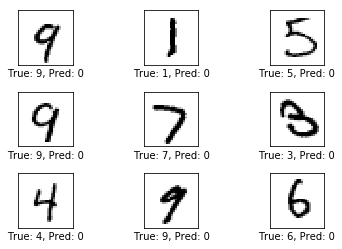

In [33]:
plot_example_errors()

# Rendimiento después de 1 iteración de optimización

Ya después de una única iteración de optimización, el modelo ha incrementado su precisión en el conjunto de prueba a 40.7% más que el 9.8%. Esto significa que clasifica incorrectamente las imágenes aproximadamente 6 de cada 10 veces, como se demuestra en algunos ejemplos a continuación.

Accuracy on test-set: 40.9%


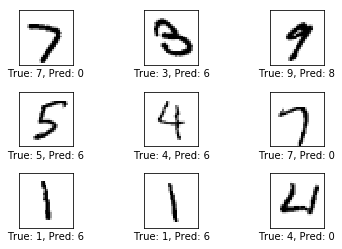

In [34]:
optimize(num_iterations=1)
print_accuracy()
plot_example_errors()

Los pesos también pueden trazarse como se muestra a continuación. Los pesos positivos son rojos y los pesos negativos son azules. Estos pesos pueden entenderse intuitivamente como filtros de imagen.

Por ejemplo, los pesos utilizados para determinar si una imagen muestra un dígito cero tienen una reacción positiva (roja) a una imagen de un círculo y tienen una reacción negativa (azul) a las imágenes con contenido en el centro del círculo.

De manera similar, los pesos utilizados para determinar si una imagen muestra un dígito reacciona positivamente (rojo) a una línea vertical en el centro de la imagen, y reacciona negativamente (azul) a las imágenes con el contenido que rodea esa línea.

Tenga en cuenta que los pesos en su mayoría se parecen a los dígitos que se supone deben reconocer. Esto se debe a que solo se ha realizado una iteración de optimización, por lo que los pesos solo se entrenan en 100 imágenes. Después de entrenar en miles de imágenes, los pesos se vuelven más difíciles de interpretar porque tienen que reconocer muchas variaciones de cómo se pueden escribir los dígitos.

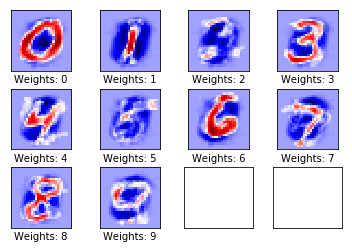

In [35]:
plot_weights()

# Performance after 10 optimization iterations

Accuracy on test-set: 71.2%


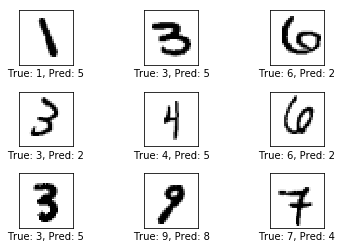

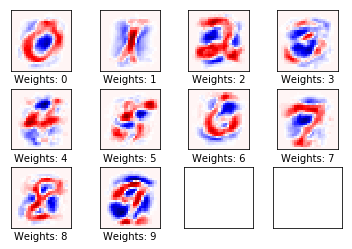

In [36]:
# We have already performed 10 iteration.
optimize(num_iterations=9)
print_accuracy()
plot_example_errors()
plot_weights()

# Rendimiento después de 1000 iteraciones de optimización

Después de 1000 iteraciones de optimización, el modelo solo clasifica erróneamente una de cada diez imágenes. Como se demuestra a continuación, algunas de las mis clasificaciones están justificadas porque las imágenes son muy difíciles de determinar con certeza incluso para los humanos, mientras que otras son bastante obvias y deberían haber sido clasificadas correctamente por un buen modelo. Pero este modelo simple no puede alcanzar un rendimiento mucho mejor y, por lo tanto, se necesitan modelos más complejos.

Accuracy on test-set: 92.1%


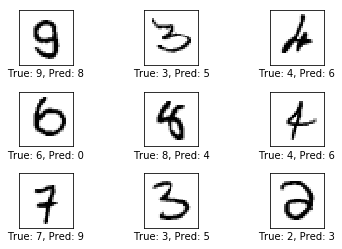

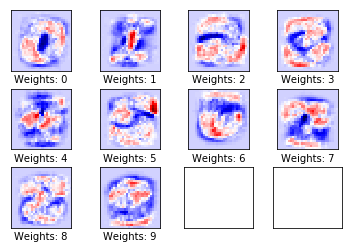

In [37]:
# We have already performed 1000 iteration.
optimize(num_iterations=999)
print_accuracy()
plot_example_errors()
plot_weights()

El modelo ahora ha sido entrenado para 1000 iteraciones de optimización, con cada iteración utilizando 100 imágenes del conjunto de entrenamiento. Debido a la gran variedad de imágenes, los pesos ahora se han vuelto difíciles de interpretar y podemos dudar si el modelo realmente comprende cómo se componen los dígitos de las líneas, o si el modelo acaba de memorizar muchas variaciones diferentes de píxeles.

El modelo ahora ha sido entrenado para 1000 iteraciones de optimización, con cada iteración utilizando 100 imágenes del conjunto de entrenamiento. Debido a la gran variedad de imágenes, los pesos ahora se han vuelto difíciles de interpretar y podemos dudar si el modelo realmente comprende cómo se componen los dígitos de las líneas, o si el modelo acaba de memorizar muchas variaciones diferentes de píxeles.

[[ 961    0    0    3    0    7    3    4    2    0]
 [   0 1097    2    4    0    2    4    2   24    0]
 [  12    8  898   23    5    4   12   12   49    9]
 [   2    0   10  927    0   28    2    9   24    8]
 [   2    1    2    2  895    0   13    4   10   53]
 [  10    1    1   37    6  774   17    4   36    6]
 [  13    3    4    2    8   19  902    3    4    0]
 [   3    6   21   12    5    1    0  936    2   42]
 [   6    3    6   18    8   26   10    5  883    9]
 [  11    5    0    7   17   11    0   16    9  933]]


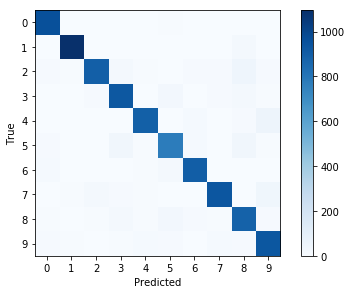

In [38]:
print_confusion_matrix()

Ahora hemos terminado de usar TensorFlow, por lo que cerramos la sesión para liberar sus recursos.

In [39]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
# session.close()

# Ejercicios

Estas son algunas sugerencias para ejercicios que pueden ayudar a mejorar sus habilidades con TensorFlow. Es importante obtener experiencia práctica con TensorFlow para aprender a usarla correctamente.

Es posible que desee hacer una copia de seguridad de este portátil antes de realizar cualquier cambio.

    Cambia la tasa de aprendizaje para el optimizador.
    Cambie el optimizador a, por ejemplo, AdagradOptimizer o AdamOptimizer.
    Cambie el tamaño de lote por ej. 1 o 1000.
    ¿Cómo afectan estos cambios al rendimiento?
    ¿Crees que estos cambios tendrán el mismo efecto (si lo hay) en otros problemas de clasificación y modelos matemáticos?
    ¿Obtiene exactamente los mismos resultados si ejecuta el portátil varias veces sin cambiar ningún parámetro? ¿Por qué o por qué no?
    Cambia la función plot_example_errors () para que también imprima los logits y los valores de y_pred para los ejemplos mal clasificados.
    Use sparse_softmax_cross_entropy_with_logits en lugar de softmax_cross_entropy_with_logits. Esto puede requerir varios cambios en varios lugares en el código fuente. Discuta las ventajas y desventajas de usar los dos métodos.
    Vuelva a programar el programa usted mismo sin mirar demasiado a este código fuente.
    Explique a un amigo cómo funciona el programa.

Licencia (MIT)

Copyright (c) 2016 por Magnus Erik Hvass Pedersen

Se concede permiso, de forma gratuita, a cualquier persona que obtenga una copia de este software y los archivos de documentación asociados (el "Software") para tratar el Software sin restricciones, incluidos, entre otros, los derechos de uso, copia, modificación y fusión , publicar, distribuir, sublicenciar y / o vender copias del Software, y permitir a las personas a quienes se les proporciona el Software que lo hagan, sujeto a las siguientes condiciones:

El aviso de copyright anterior y este aviso de permiso se incluirán en todas las copias o partes sustanciales del Software.

EL SOFTWARE SE SUMINISTRA "TAL CUAL", SIN GARANTÍA DE NINGÚN TIPO, EXPRESA O IMPLÍCITA, INCLUIDAS, ENTRE OTRAS, LAS GARANTÍAS DE COMERCIABILIDAD, IDONEIDAD PARA UN PROPÓSITO PARTICULAR Y NO INFRACCIÓN. EN NINGÚN CASO, LOS AUTORES O TITULARES DE DERECHOS DE AUTOR SERÁN RESPONSABLES DE CUALQUIER RECLAMACIÓN, DAÑO U OTRA RESPONSABILIDAD, YA SEA EN UNA ACCIÓN CONTRACTUAL, AGRAVIO O DE OTRO TIPO, DERIVADA DE O RELACIONADA CON EL SOFTWARE O EL USO U OTRAS NEGOCIACIONES EN EL SOFTWARE.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

# Load Data.....
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

print(data.test.labels[0:5, :])


data.test.cls = np.array([label.argmax() for label in data.test.labels])
print (data.test.cls[0:5])

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[7 2 1 0 4]
